In [36]:
!pip install seaborn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from typing import Tuple

In [38]:
def load_and_clean_data() -> pd.DataFrame:
    """
    Load California Housing dataset and convert it to a pandas DataFrame.
    Returns cleaned DataFrame with relevant features.
    """
    # Load the California housing dataset
    housing = fetch_california_housing()

    # Convert to DataFrame
    df = pd.DataFrame(
        housing.data,
        columns=housing.feature_names
    )
    df['PRICE'] = housing.target

    return df

In [39]:
def create_distribution_plot(df: pd.DataFrame) -> plt.Figure:
    """
    Create a histogram showing the distribution of house prices.
    Returns matplotlib figure object.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='PRICE', bins=50)
    plt.title('Distribution of House Prices in California')
    plt.xlabel('Price (100k USD)')
    plt.ylabel('Count of Houses')
    plt.show()
    return plt.gcf()

In [40]:
def create_scatter_plot(df: pd.DataFrame) -> plt.Figure:
    """
    Create a scatter plot showing relationship between median income
    and house prices.
    Returns matplotlib figure object.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df,
                    x='MedInc',
                    y='PRICE',
                    alpha=0.5)
    plt.title('Median Income vs House Prices')
    plt.xlabel('Median Income (10k USD)')
    plt.ylabel('House Price (100k USD)')
    plt.show()
    return plt.gcf()

In [41]:
def create_heatmap(df: pd.DataFrame) -> plt.Figure:
    """
    Create a correlation heatmap of housing metrics.
    Returns matplotlib figure object.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix,
                annot=True,
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                center=0,
                fmt='.2f')
    plt.title('Correlation Heatmap of Housing Features')
    plt.show()
    return plt.gcf()

In [42]:
def generate_statistics(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Generate descriptive statistics and correlation matrix.
    Returns tuple of (descriptive stats, correlation matrix).
    """
    descriptive_stats = df.describe()
    correlation_matrix = df.corr()

    return descriptive_stats, correlation_matrix

In [45]:
def main():
    # Set the style for better-looking plots
    # plt.style.use('seaborn')

    # Load and clean data
    df = load_and_clean_data()

    # Generate all visualizations
    dist_plot = create_distribution_plot(df)
    scatter_plot = create_scatter_plot(df)
    heatmap = create_heatmap(df)

    # Generate statistics
    desc_stats, corr_matrix = generate_statistics(df)

    # Save plots
    dist_plot.savefig('distribution_plot.png', bbox_inches='tight', dpi=300)
    scatter_plot.savefig('scatter_plot.png', bbox_inches='tight', dpi=300)
    heatmap.savefig('heatmap.png', bbox_inches='tight', dpi=300)

    # Print statistics
    print("\nDescriptive Statistics:")
    print(desc_stats)
    print("\nCorrelation Matrix:")
    print(corr_matrix)

    plt.close('all')  # Clean up memory

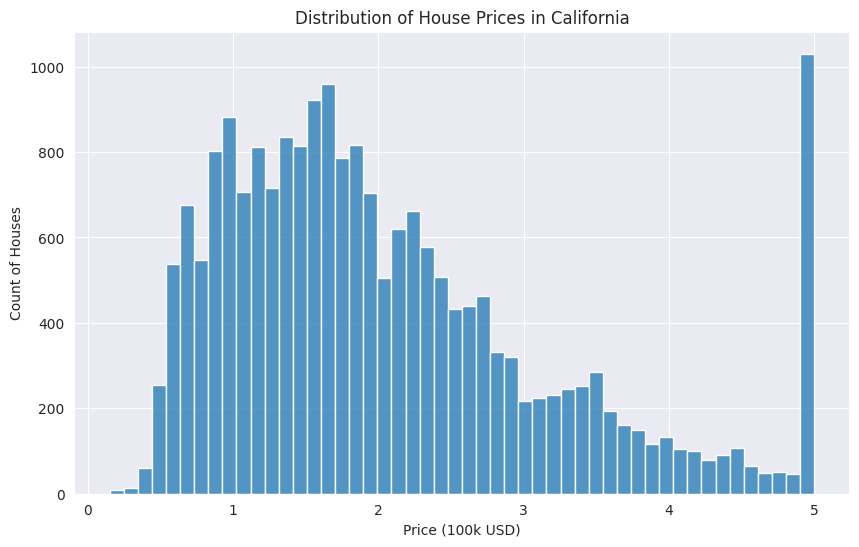

<Figure size 640x480 with 0 Axes>

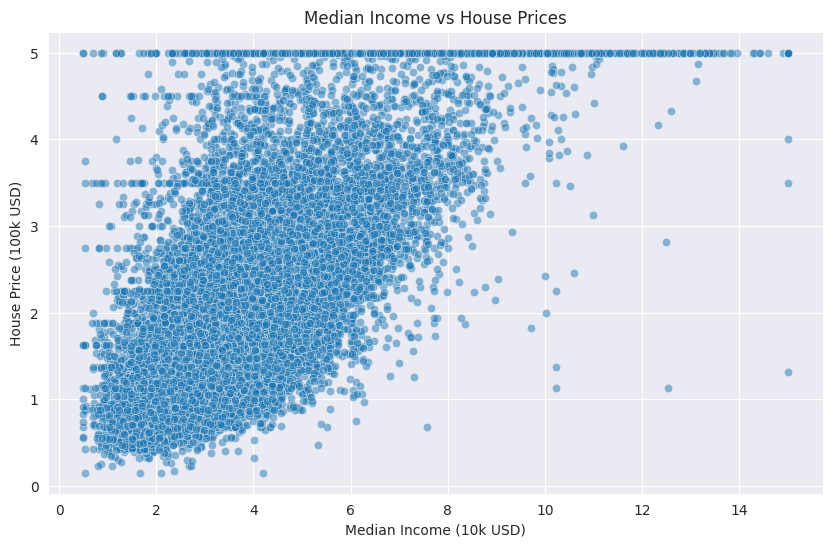

<Figure size 640x480 with 0 Axes>

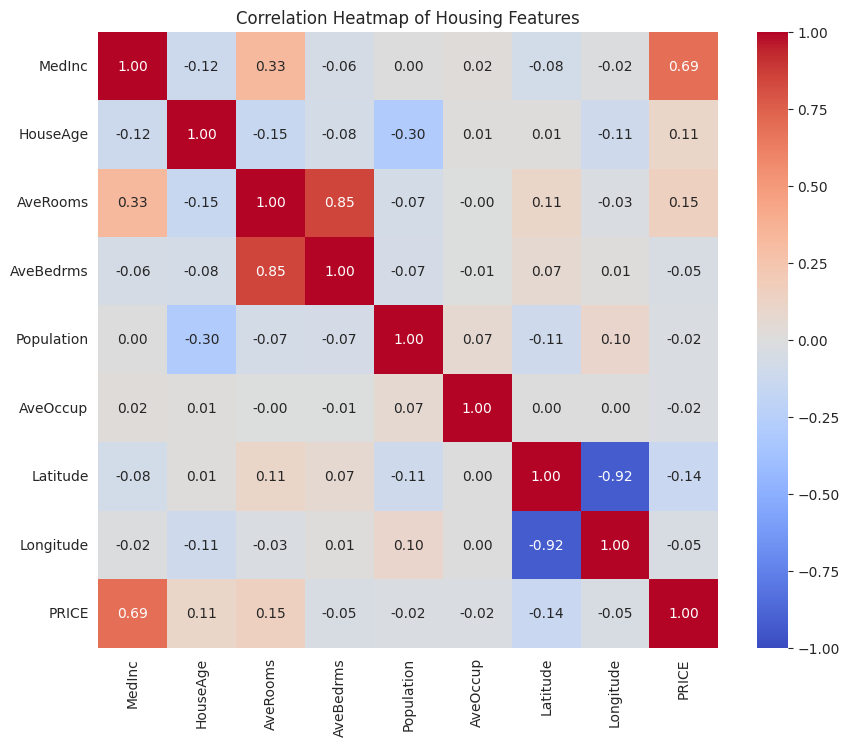


Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min    

In [47]:
if __name__ == "__main__":
    main()
